# **QUESTION 1 + 2**

## 1. Data Cleaning

### **Data Overview**

In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/MyDrive/'

Mounted at /content/drive


In [ ]:
df = pd.read_excel(path+"churn_prediction.xlsx")
print(df)

      CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
0          52869      0    20.0         Mobile Phone         3   
1          52942      0    13.0             Computer         1   
2          52972      0    16.0         Mobile Phone         3   
3          53125      0     5.0         Mobile Phone         1   
4          53367      0     9.0         Mobile Phone         1   
...          ...    ...     ...                  ...       ...   
5625       55535      0    61.0         Mobile Phone         3   
5626       55538      0    23.0             Computer         1   
5627       55562      0    29.0         Mobile Phone         2   
5628       55598      0    13.0             Computer         1   
5629       55604      0    16.0         Mobile Phone         1   

      WarehouseToHome PreferredPaymentMode  Gender  HourSpendOnApp  \
0                 7.0             E wallet  Female             4.0   
1                 9.0     Cash on Delivery  Female             4.0 

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

### **Handle Missing/Duplicate Values**

In [ ]:
print(df.isna().sum())

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64


In [ ]:
print(df.describe())

         CustomerID        Churn       Tenure     CityTier  WarehouseToHome  \
count   5630.000000  5630.000000  5366.000000  5630.000000      5379.000000   
mean   52815.500000     0.168384    10.189899     1.654707        15.639896   
std     1625.385339     0.374240     8.557241     0.915389         8.531475   
min    50001.000000     0.000000     0.000000     1.000000         5.000000   
25%    51408.250000     0.000000     2.000000     1.000000         9.000000   
50%    52815.500000     0.000000     9.000000     1.000000        14.000000   
75%    54222.750000     0.000000    16.000000     3.000000        20.000000   
max    55630.000000     1.000000    61.000000     3.000000       127.000000   

       HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
count     5375.000000               5630.000000        5630.000000   
mean         2.931535                  3.688988           3.066785   
std          0.721926                  1.023999           1.380194   
min     

=> isna columns are numeric columns

In [ ]:
# Tenure, HourSpendOnApp, CouponUsed, DaySinceLastOrder have 0 in values => replace 0
df['Tenure'].fillna(0, inplace=True)
df['HourSpendOnApp'].fillna(0, inplace=True)
df['CouponUsed'].fillna(0, inplace=True)
df['DaySinceLastOrder'].fillna(0, inplace=True)

In [ ]:
# OrderAmountHikeFromlastYear is Percentage increases in order from last year
# If the number orders last year = the number orders in this year => can have 0 in values => replace 0
df['OrderAmountHikeFromlastYear'].fillna(0, inplace=True)

# OrderCount is Total number of orders has been places in last month
# If the customer did not buy anything last month => can have 0 in values => replace 0
df['OrderCount'].fillna(0, inplace=True)

<Axes: ylabel='WarehouseToHome'>

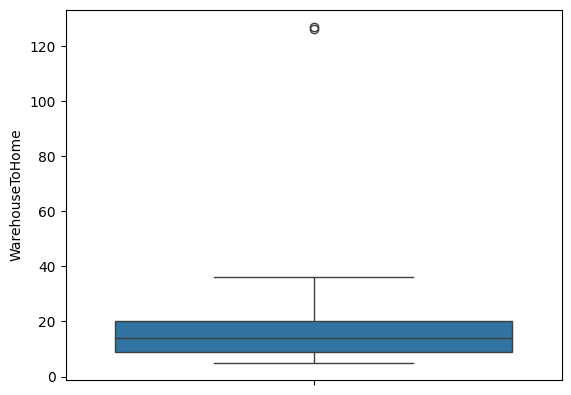

In [ ]:
# WarehouseToHome  => don't have 0 in values
# check outlier
sns.boxplot(df['WarehouseToHome'])


In [ ]:
# WarehouseToHome can cover outliers => replace median
WarehouseToHome_median = df['WarehouseToHome'].median()
df['WarehouseToHome'].fillna(WarehouseToHome_median, inplace=True)

print(df.isna().sum())

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64


In [ ]:
df.duplicated().any()

False

### **Check imbalanced**

In [ ]:
label_ratio = df['Churn'].value_counts(normalize=True)
label_ratio

,proportion
Churn,
0,0.831616
1,0.168384


The ration of label 1 on total is 16% => We can continue with the EDA and ML model

### **Univariate Analysis**

In [ ]:
df.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

In [ ]:
obj_cols = df.select_dtypes(include=['object'])
num_cols = df.select_dtypes(exclude=['object'])

In [ ]:
num_cols.nunique()

,0
CustomerID,5630
Churn,2
Tenure,36
CityTier,3
WarehouseToHome,34
HourSpendOnApp,6
NumberOfDeviceRegistered,6
SatisfactionScore,5
NumberOfAddress,15
Complain,2


As showing the unique values of each numeric columns, there are 5 columns have low unique values (less than 10 values), which are CityTier, HourSpendOnApp, NumberOfDeviceRegistered, SatisfactionScore and Complain.

&#8594; CityTier have dtype = numeric but have category meaning. => convert to object

&#8594; HourSpendOnApp, NumberOfDeviceRegistered, SatisfactionScore, Complain have dtype = numeric but don't have category meaning.

In [ ]:
df['CityTier'] = df['CityTier'].astype(object)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5630 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   object 
 5   WarehouseToHome              5630 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5630 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

## 2. Transforms Features

In [ ]:
list_columns = ['PreferredLoginDevice','CityTier','PreferredPaymentMode','Gender','PreferedOrderCat','MaritalStatus']
data_encoded = pd.get_dummies(df, columns=list_columns, dtype='int')
data_encoded = data_encoded.drop(columns=['CustomerID'])

print(data_encoded.head())

   Churn  Tenure  WarehouseToHome  HourSpendOnApp  NumberOfDeviceRegistered  \
0      0    20.0              7.0             4.0                         4   
1      0    13.0              9.0             4.0                         4   
2      0    16.0              7.0             3.0                         4   
3      0     5.0             16.0             3.0                         4   
4      0     9.0             28.0             3.0                         4   

   SatisfactionScore  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
0                  5                3         0                         26.0   
1                  3                2         0                         26.0   
2                  3                3         0                         26.0   
3                  4                3         0                         26.0   
4                  2                3         1                         26.0   

   CouponUsed  ...  Gender_Male  PreferedOrd

## 3. Apply base Random Forest model

### **Split train/test set & Normalization**

In [ ]:
from sklearn.model_selection import train_test_split
x=data_encoded.drop('Churn', axis = 1)
y=data_encoded[['Churn']]


x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

print(f"Number data of train set: {len(x_train)}")
print(f"Number data of test set: {len(x_test)}")

Number data of train set: 3941
Number data of test set: 1689


In [ ]:
from sklearn.preprocessing import MinMaxScaler

#Scale Feature:
scaler = MinMaxScaler()
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

### **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
# Train a Random Forest classifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(x_train_scaled, y_train)

# Make predictions
y_pred = classifier.predict(x_test_scaled)

# Evaluate the model
RandomForest_accuracy = accuracy_score(y_test, y_pred)
RandomForest_conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {RandomForest_accuracy:.2f}')
print(f'Confusion Matrix:\n{RandomForest_conf_matrix}')


Accuracy: 0.94
Confusion Matrix:
[[1369   18]
 [  79  223]]


=> Chỉ số accuracy trên tập test là 94% nghĩa là model này có dự đoán đúng, importance feature đúng.

## 4. Show Feature Importance from model

In [ ]:
clf_rand = RandomForestClassifier(max_depth=2, random_state=0)

clf_rand.fit(x_train_scaled, y_train)
y_ranf_pre_train = clf_rand.predict(x_train_scaled)
y_ranf_pre_test = clf_rand.predict(x_test_scaled)

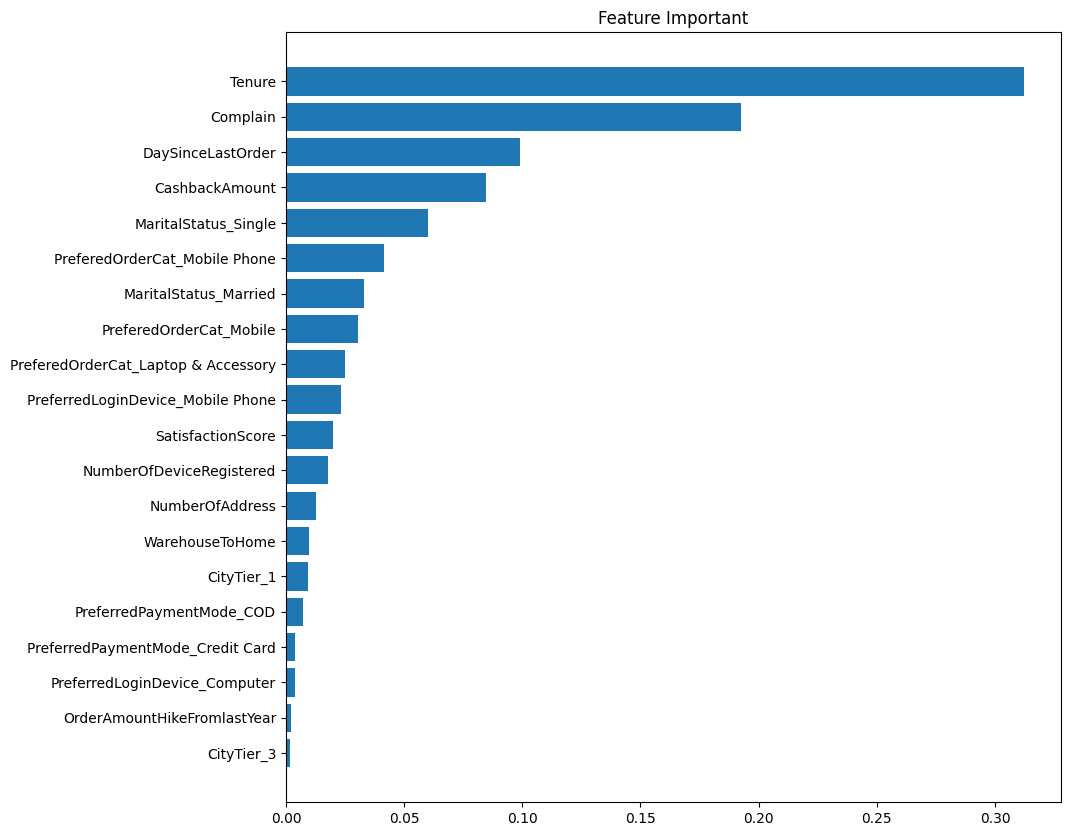

In [ ]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(x_test.columns, clf_rand.feature_importances_):
    feats[feature] = importance #add the name/value pair

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances = importances.sort_values(by='Gini-importance', ascending=True)

importances = importances.reset_index()

# Create bar chart
plt.figure(figsize=(10, 10))
plt.barh(importances.tail(20)['index'][:20], importances.tail(20)['Gini-importance'])

plt.title('Feature Important')

# Show plot
plt.show()

=> Từ biểu đồ Feature Important chọn ra 6 feature cao nhất là: Tenure, Complain, DaySinceLastOrder, CashbackAmount, MaritalStatus_Single, PreferedOrderCat_Mobile Phone.

## 5. Choose top n features to analyse

In [ ]:
# Get CustomerID and Feature Important
Feature_Important = data_encoded[['Churn','Tenure', 'Complain', 'DaySinceLastOrder', 'CashbackAmount', 'MaritalStatus_Single', 'PreferedOrderCat_Mobile Phone']]

print(Feature_Important)

      Churn  Tenure  Complain  DaySinceLastOrder  CashbackAmount  \
0         0    20.0         0                0.0          229.53   
1         0    13.0         0                9.0          234.38   
2         0    16.0         0                7.0          174.07   
3         0     5.0         0                9.0          231.48   
4         0     9.0         1                8.0          165.14   
...     ...     ...       ...                ...             ...   
5625      0    61.0         1                1.0          303.75   
5626      0    23.0         0                4.0          316.61   
5627      0    29.0         1                5.0          321.36   
5628      0    13.0         0                4.0          319.31   
5629      0    16.0         0               15.0          313.80   

      MaritalStatus_Single  PreferedOrderCat_Mobile Phone  
0                        0                              0  
1                        1                              0  
2  

In [ ]:
# Get the churning users
Feature_Important = Feature_Important[Feature_Important['Churn']==1]

In [ ]:
Feature_Important = Feature_Important.drop(columns=['Churn'])
print(Feature_Important)

      Tenure  Complain  DaySinceLastOrder  CashbackAmount  \
7        1.0         1                1.0          143.59   
24       1.0         1                1.0          143.59   
40       0.0         1                0.0          118.59   
58       0.0         1                0.0          118.59   
68       1.0         1                7.0          185.74   
...      ...       ...                ...             ...   
5469    21.0         1                9.0          317.46   
5494     9.0         1               12.0          313.24   
5531     5.0         0                9.0          320.45   
5571    21.0         1                9.0          317.46   
5596     9.0         1               12.0          313.24   

      MaritalStatus_Single  PreferedOrderCat_Mobile Phone  
7                        1                              1  
24                       1                              1  
40                       1                              1  
58                       1 

# **QUESTION 3**

## 1. EDA again

### **Dimension Reduction**

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(Feature_Important)
PCA_ds = pd.DataFrame(pca.transform(Feature_Important), columns=(["col1","col2", "col3"]))
PCA_ds

,col1,col2,col3
0,-16.931891,-1.073047,-1.561731
1,-16.931891,-1.073047,-1.561731
2,-41.964549,-0.547315,-1.846991
3,-41.964549,-0.547315,-1.846991
4,25.297365,-3.626407,3.240823
...,...,...,...
943,157.993669,8.296819,1.406357
944,153.137796,-3.413477,4.581902
945,160.003438,-7.848773,1.389683
946,157.993669,8.296819,1.406357


In [ ]:
pca.explained_variance_ratio_

array([0.97756614, 0.0151456 , 0.00682085])

## 2. Apply K-Means model

### **Choosing K:**

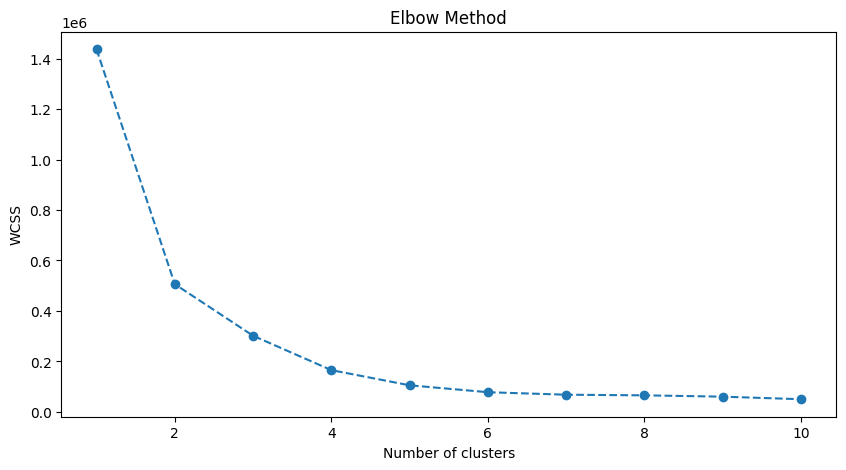

In [ ]:
from sklearn.cluster import KMeans
ss = []
max_clusters = 10
for i in range(1, max_clusters+1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(PCA_ds)
    # Inertia method returns WCSS for that model
    ss.append(kmeans.inertia_)

# Plot the Elbow method
plt.figure(figsize=(10,5))
plt.plot(range(1, max_clusters+1), ss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

=> Choose k=4

### **Apply K-Means:**

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
predicted_labels = kmeans.fit_predict(PCA_ds)

PCA_ds['clusters']=predicted_labels
Feature_Important['clusters']=predicted_labels

In [ ]:
Feature_Important

,Tenure,Complain,DaySinceLastOrder,CashbackAmount,MaritalStatus_Single,PreferedOrderCat_Mobile Phone,clusters
7,1.0,1,1.0,143.59,1,1,1
24,1.0,1,1.0,143.59,1,1,1
40,0.0,1,0.0,118.59,1,1,3
58,0.0,1,0.0,118.59,1,1,3
68,1.0,1,7.0,185.74,1,0,2
...,...,...,...,...,...,...,...
5469,21.0,1,9.0,317.46,1,0,0
5494,9.0,1,12.0,313.24,1,0,0
5531,5.0,0,9.0,320.45,0,0,0
5571,21.0,1,9.0,317.46,1,0,0


### **Silhouette Score:**

In [ ]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(PCA_ds, predicted_labels)
print(sil_score)

0.5399135967528276


=> silhouette_score=0.5 shows that the data is clustered quite well.

### **Distribution of clusters:**

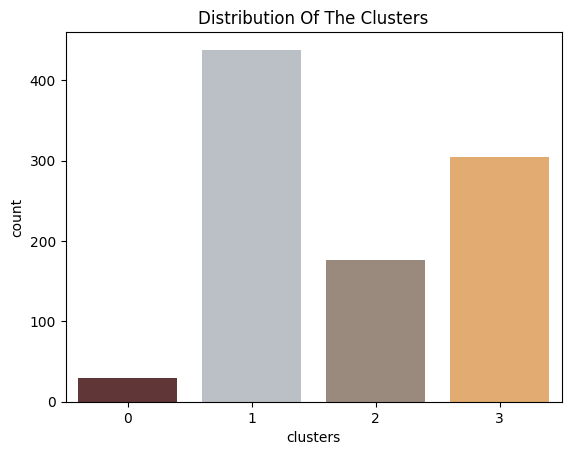

In [ ]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=Feature_Important["clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

=> Cluster 1 has the most distribution (accounted for more 400 users)

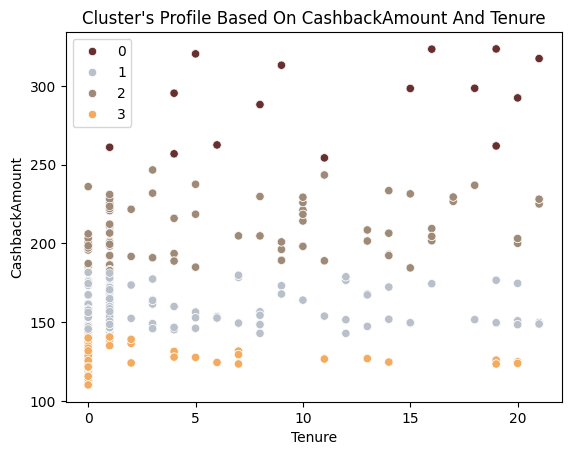

In [ ]:
pl = sns.scatterplot(data = Feature_Important,x=Feature_Important["Tenure"], y=Feature_Important["CashbackAmount"],hue=Feature_Important["clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On CashbackAmount And Tenure")
plt.legend()
plt.show()

=> The distribution of clusters by CashbackAmount And Tenure is almost the same.

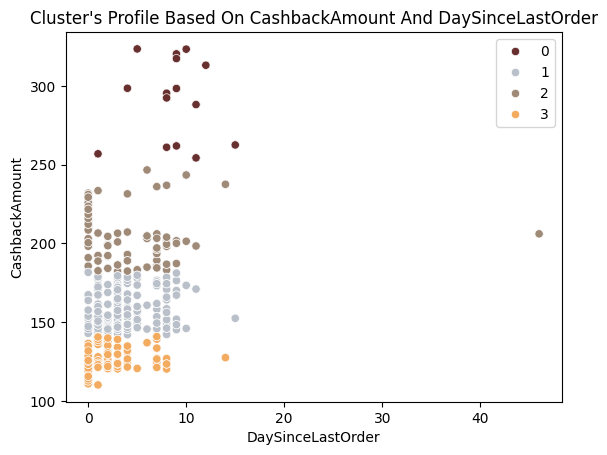

In [ ]:
pl = sns.scatterplot(data = Feature_Important,x=Feature_Important["DaySinceLastOrder"], y=Feature_Important["CashbackAmount"],hue=Feature_Important["clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On CashbackAmount And DaySinceLastOrder")
plt.legend()
plt.show()

=> The distribution of clusters is mainly concentrated in the range of 0-20 recent days.

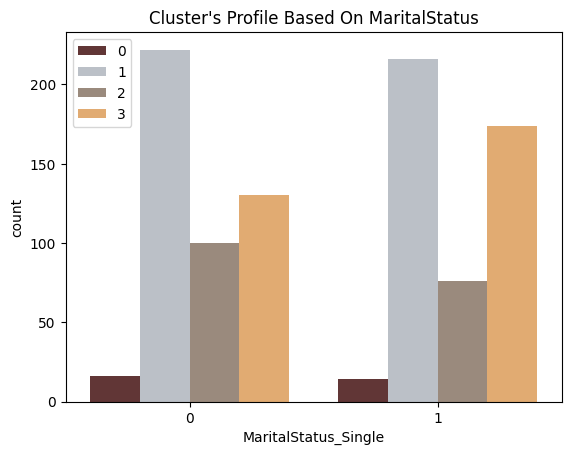

In [ ]:
pl = sns.countplot(data = Feature_Important,x=Feature_Important["MaritalStatus_Single"],hue=Feature_Important["clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On MaritalStatus")
plt.legend()
plt.show()

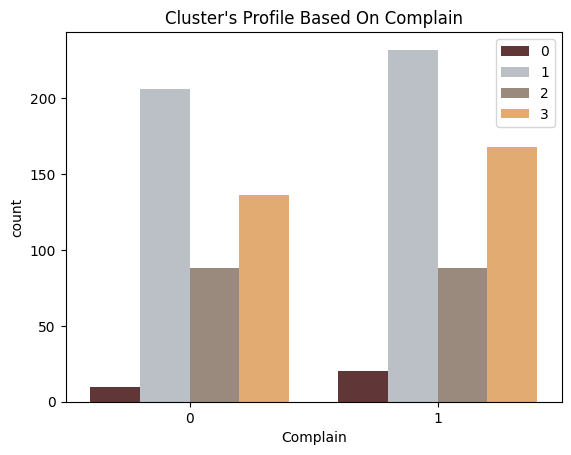

In [ ]:
pl = sns.countplot(data = Feature_Important,x=Feature_Important["Complain"],hue=Feature_Important["clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On Complain")
plt.legend()
plt.show()

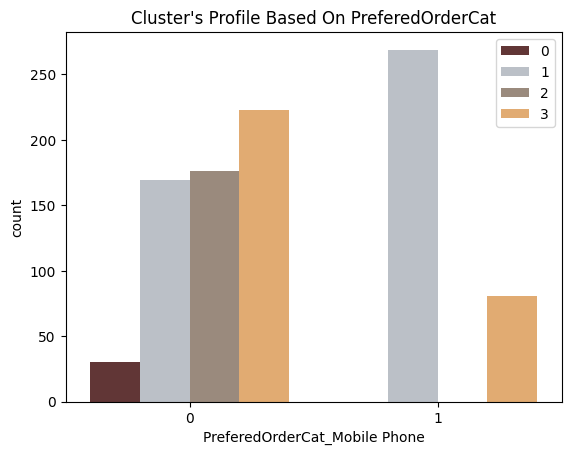

In [ ]:
pl = sns.countplot(data = Feature_Important,x=Feature_Important["PreferedOrderCat_Mobile Phone"],hue=Feature_Important["clusters"], palette= pal)
pl.set_title("Cluster's Profile Based On PreferedOrderCat")
plt.legend()
plt.show()

## 3. GridSearchCV model

### **Split train/test set & Normalization**

In [ ]:
x2 = Feature_Important.drop('clusters', axis = 1)
y2 = Feature_Important[['clusters']]


x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2, test_size=0.3, random_state=42)

print(f"Number data of train set: {len(x2_train)}")
print(f"Number data of test set: {len(x2_test)}")

Number data of train set: 663
Number data of test set: 285


In [ ]:
from sklearn.preprocessing import MinMaxScaler

#Scale Feature:
scaler = MinMaxScaler()
scaler.fit(x2_train)

x2_train_scaled = scaler.transform(x2_train)
x2_test_scaled = scaler.transform(x2_test)

### **Apply Model**

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(clf_rand, param_grid, cv=5, scoring='balanced_accuracy')

# Fit the model
grid_search.fit(x2_train_scaled, y2_train)

# Print the best parameters
print("Best Parameters: ", grid_search.best_params_)

# Evaluate the best model on the test set
best_clf = grid_search.best_estimator_
accuracy = best_clf.score(x2_test_scaled, y2_test)
print("Test set accuracy: ", accuracy)

Best Parameters:  {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Test set accuracy:  1.0


### **Feature Importance of Clusters**

In [ ]:
clf_rand.fit(x2_train_scaled, y2_train)
y2_ranf_pre_train = clf_rand.predict(x2_train_scaled)
y2_ranf_pre_test = clf_rand.predict(x2_test_scaled)

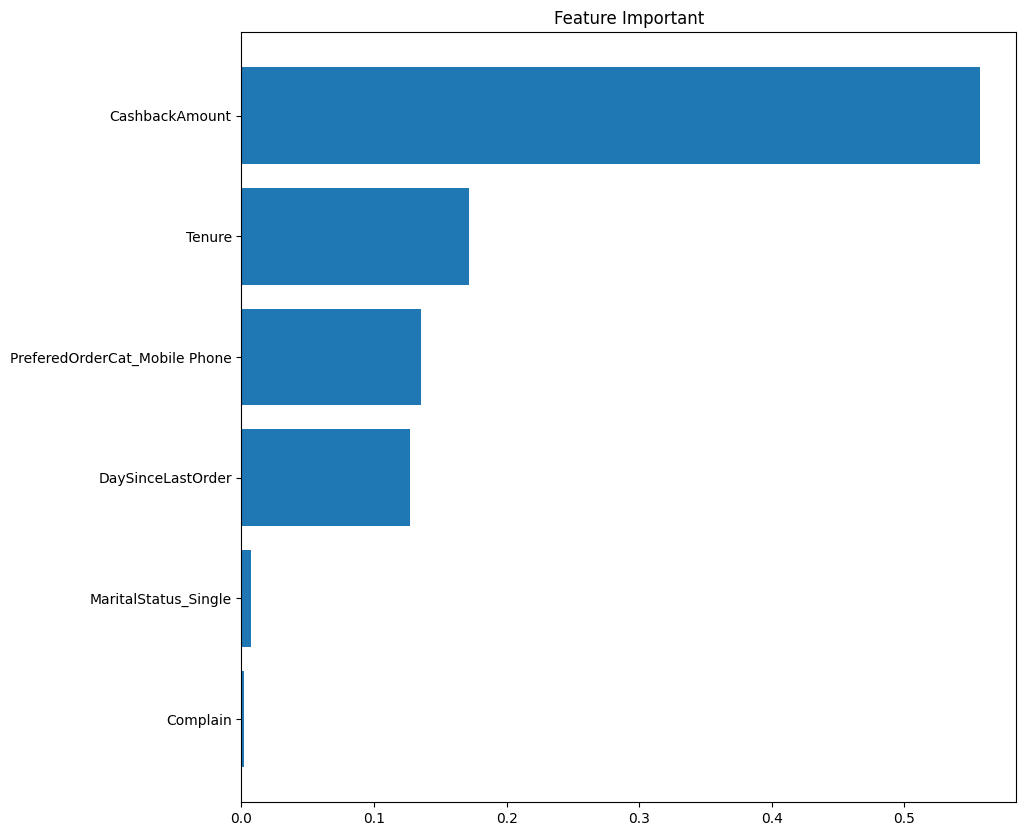

In [ ]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(x2_test.columns, clf_rand.feature_importances_):
    feats[feature] = importance #add the name/value pair

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances = importances.sort_values(by='Gini-importance', ascending=True)

importances = importances.reset_index()

# Create bar chart
plt.figure(figsize=(10, 10))
plt.barh(importances.tail(20)['index'][:20], importances.tail(20)['Gini-importance'])

plt.title('Feature Important')

# Show plot
plt.show()

=> CashbackAmount is the most important factor in clustering for churned users. It is 3 times more important than Tenure, which is the second most important.

# **Conclusion**

The majority of churned users are:
 - Using Mobile Phone
 - Tenure in ranges from 0 to 20
 - DaySinceLastOrder in ranges from 0 to 20 recent days
 - CashbackAmount	in ranges from 100 to 325

 => According to the distribution, the order from most to few users in the cluster is 1-3-2-0.
1. Cluster 1:
  - CashbackAmount: Large (about 190-250)
2. Cluster 3:
  - CashbackAmount: Smallest (about 100-140)
3. Cluster 2:
  - CashbackAmount: Small (about 140-190)
4. Cluster 0:
  - CashbackAmount: Largest (about >250)  